In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib widget

In [59]:
df = pd.read_csv("filtered_df.csv")
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I'm really disappointed about my phone and ser...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I was able to get the phone I previously owned...,6.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,I love the phone. It does everything I need an...,1.0
3,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,5,Bought this as an alternative to a smart phone...,1.0
4,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,5,Used this unlocked GSM Nokia Asha 302 in the P...,1.0
...,...,...,...,...,...,...
59317,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Really like the phone and ease of use. The scr...,12.0
59318,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Much better than I expected. This phone has ev...,2.0
59319,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,2,This phone started out working beautifully for...,NaN
59320,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,"I like flip phones, they are easily to use.I h...",2.0


In [64]:
from transformers import AutoTokenizer, AutoModel
import torch

def get_sentence_embedding(sentence, model, tokenizer):
    # Tokenize input sentence
    tokens = tokenizer(sentence, return_tensors="pt", truncation=True, max_length=512)

    # Get the transformer model output
    with torch.no_grad():
        outputs = model(**tokens)

    # Extract the output embeddings (CLS token)
    embeddings = outputs.last_hidden_state[:, 0, :]

    return embeddings.numpy()

# Load pre-trained model and tokenizer
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Example sentence
example_sentence = "This mobile phone was very good"

# Get sentence embedding
sentence_embedding = get_sentence_embedding(example_sentence, model, tokenizer)

# Convert to numpy array for easier handling
sentence_embedding_np = sentence_embedding


[[-1.98852777e-01 -2.02450380e-01  1.40957609e-01  5.16609885e-02
  -1.46022094e-02 -9.62326005e-02  3.96276750e-02  4.03227687e-01
  -2.11489409e-01 -2.00884998e-01  1.21080786e-01 -2.19155878e-01
   9.11399424e-02  2.02934116e-01 -4.10078466e-02 -6.86699972e-02
  -6.71621859e-02  2.35471979e-01  2.71457464e-01 -4.42650542e-02
  -2.17167944e-01 -2.98446149e-01  1.00879312e-01  1.47127658e-01
  -4.95240092e-02 -1.69454142e-01  1.70385614e-01  2.22123593e-01
   1.48817584e-01 -5.61269484e-02 -2.62026526e-02  9.80967730e-02
  -2.91586459e-01 -1.98307000e-02  2.29563285e-02 -6.10690936e-02
  -8.32445361e-03  6.14568889e-02 -7.65723288e-02 -3.96796539e-02
  -1.61755785e-01 -1.37314601e-02  2.96414405e-01  1.53980613e-01
  -2.49919236e-01 -5.48526198e-02 -2.10836864e+00  1.04525916e-01
  -1.27347019e-02 -3.39229256e-01  2.57790387e-01 -7.13288859e-02
  -4.26508188e-02  3.96351248e-01  3.28058243e-01  2.38471344e-01
  -1.01487994e-01  4.27651316e-01 -1.08878210e-01  1.45330444e-01
   2.25919

In [65]:
counts = df["Product Name"].value_counts().reset_index()
subset = df[df["Product Name"] == counts.iloc[100]["Product Name"]]
subset["embedding"] = subset["Reviews"].apply(get_sentence_embedding, args = (model, tokenizer))
subset

/tmp/ipykernel_19333/2515207373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["embedding"] = subset["Reviews"].apply(get_sentence_embedding, args = (model, tokenizer))


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,embedding
28782,LG G3 D855 32GB LTE Unlocked GSM Android Smart...,LG,210.95,3,"While I love the phone, several things have me...",1.0,"[[-0.14410925, -0.12998378, 0.08929029, -0.122..."
28783,LG G3 D855 32GB LTE Unlocked GSM Android Smart...,LG,210.95,5,Delivered on time. This cell phone is just gre...,2.0,"[[0.026973475, -0.010841376, 0.080263965, -0.1..."
28784,LG G3 D855 32GB LTE Unlocked GSM Android Smart...,LG,210.95,1,This phone is not an original. There are lots ...,3.0,"[[0.01054571, -0.05936037, 0.024906099, -0.254..."
28785,LG G3 D855 32GB LTE Unlocked GSM Android Smart...,LG,210.95,5,This is an excellent fully unlocked phone. Ama...,1.0,"[[-0.052376248, -0.14177546, 0.25704455, -0.16..."
28786,LG G3 D855 32GB LTE Unlocked GSM Android Smart...,LG,210.95,4,Love the phone. Just had a few problems on ATT...,1.0,"[[0.009518366, -0.06135311, 0.0039834883, -0.2..."
...,...,...,...,...,...,...,...
28873,LG G3 D855 32GB LTE Unlocked GSM Android Smart...,LG,210.95,1,I bought this almost a month ago and it has be...,3.0,"[[-0.057899974, -0.04102793, 0.059444938, -0.1..."
28874,LG G3 D855 32GB LTE Unlocked GSM Android Smart...,LG,210.95,1,"The phone was delivered on time, but defective...",2.0,"[[-0.09526302, -0.14014916, 0.21660776, 0.0213..."
28875,LG G3 D855 32GB LTE Unlocked GSM Android Smart...,LG,210.95,5,The only issue that i coul find is the battery...,NaN,"[[0.053737234, -0.043764435, 0.13984206, -0.07..."
28876,LG G3 D855 32GB LTE Unlocked GSM Android Smart...,LG,210.95,5,Arrived before time and as described exactly.....,NaN,"[[-0.15357001, -0.01914224, 0.16137522, -0.124..."


In [67]:

pca = PCA(n_components=3)
embed = np.vstack(subset["embedding"].to_numpy())
project = pca.fit_transform(embed)
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(embed)
subset["cluster"] = clusters

/home/hp/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_19333/2820431430.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["cluster"] = clusters


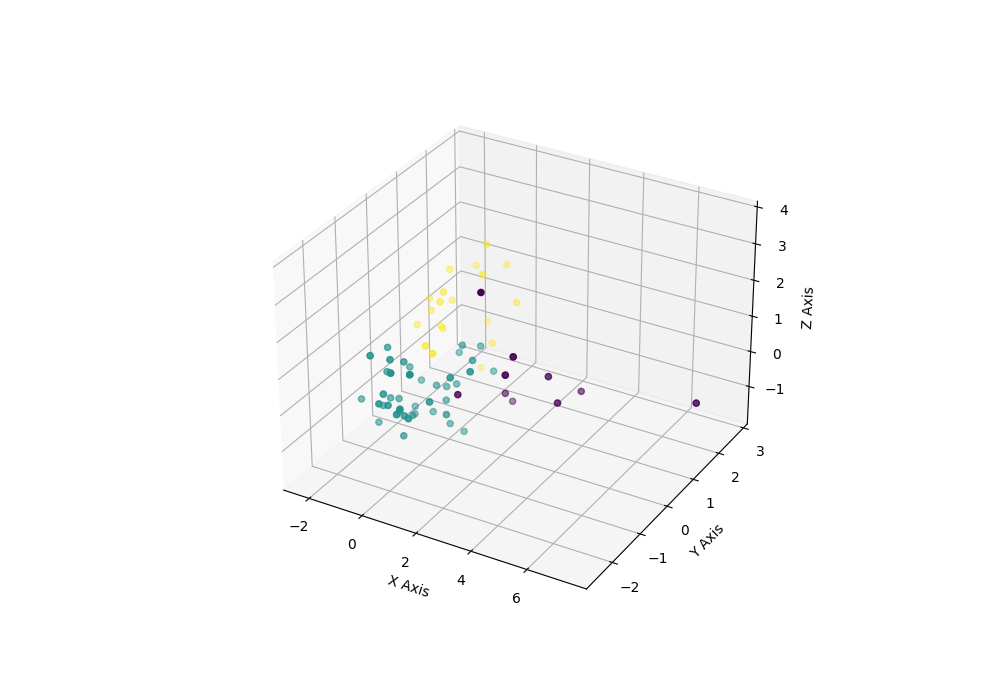

In [68]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.scatter3D(project[:,0], project[:,1], project[:,2], c=clusters)


/home/hp/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hp/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hp/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


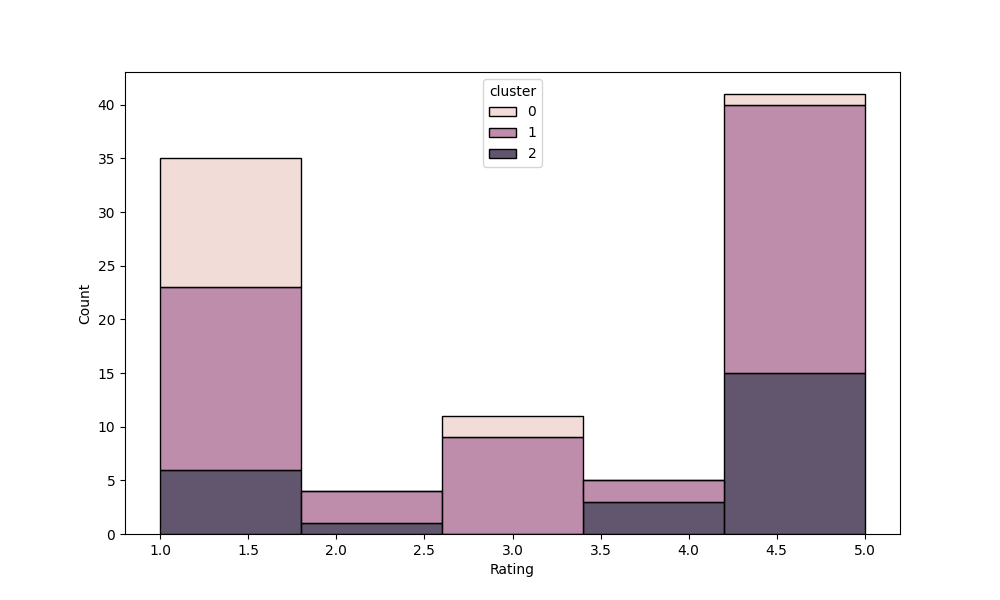

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(data=subset, x='Rating', hue='cluster', multiple="stack", bins=5)
plt.show()

In [74]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def preprocess(doc):
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    processed_docs = []
    words = [ps.stem(word.lower()) for word in word_tokenize(doc) if word.isalpha() and word.lower() not in stop_words]
    return words

def calculate_term_frequency(documents):
    term_frequency = Counter()
    for doc in documents:
        term_frequency.update(doc)
    return term_frequency

subset["preprocessed"] = subset["Reviews"].apply(preprocess)
tf_group = [calculate_term_frequency(subset["preprocessed"][subset["cluster"] == i]) for i in range(3)]
terms_group_more = [{term: tf_group[i][term] for term in tf_group[i] if tf_group[i][term] > tf_group[(i+1)%3][term] 
                        and tf_group[i][term] > tf_group[(i+2)%3][term]} for i in range(3)]
terms_group_more = [sorted(cnt.items(), key=lambda x: x[1], reverse=True) for cnt in terms_group_more]

[nltk_data] Downloading package stopwords to /home/hp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/hp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_19333/179199217.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["preprocessed"] = subset["Reviews"].apply(preprocess)


In [78]:
terms_group_more[2]

[('recommend', 3),
 ('consumpt', 2),
 ('job', 2),
 ('topic', 2),
 ('durat', 2),
 ('aspect', 2),
 ('msg', 2),
 ('sent', 2),
 ('exactli', 2),
 ('thx', 2),
 ('wait', 2),
 ('coul', 2),
 ('find', 2),
 ('content', 2),
 ('shame', 2),
 ('optim', 2),
 ('disabl', 2),
 ('bulletin', 2),
 ('desktop', 2),
 ('drain', 2),
 ('supperb', 1),
 ('afford', 1),
 ('techi', 1),
 ('son', 1),
 ('non', 1),
 ('waz', 1),
 ('hebrew', 1),
 ('languag', 1),
 ('weaker', 1),
 ('orgin', 1),
 ('qualityth', 1),
 ('hi', 1),
 ('realiz', 1),
 ('seiou', 1),
 ('balanc', 1),
 ('swich', 1),
 ('exceed', 1),
 ('complain', 1),
 ('glad', 1),
 ('chose', 1),
 ('worker', 1),
 ('jealou', 1),
 ('unfortun', 1),
 ('multipl', 1),
 ('troubleshoot', 1),
 ('furiou', 1),
 ('mistak', 1),
 ('appar', 1),
 ('chanc', 1),
 ('constatli', 1),
 ('bye', 1),
 ('totali', 1),
 ('disapoint', 1),
 ('english', 1)]